In [1]:
import glob
import os
import matplotlib.pyplot as plt
import torch
import numpy as np
import tensornetwork as tn
from utilities import EntanglementEntropy, ReflectedEntropySpectrum
from utilities import ShannonEntropy
from visualization import plot_optimum_difference_renyi
from visualization import plot_optimum_difference, plot_tripartite
from config import data_dir

def get_reflected_spectrum(state):
    """Calculate the refelected spectrum."""
    return ReflectedEntropySpectrum(tn.Node(torch.einsum('ijab, klab -> ijkl', state, state.conj())),[0])[0]

    
plt.rcParams.update({'font.size': 15})

## Data Compilation

In the cell below we collect all the data we have generated using the looped_minimization.py script. The data are placed inside the **data** dictionary where the system's dimensionality <strong>dim0_dim1_dim2_dim3</strong> are the keys used. Once we choose the system's dimensionality, its data is stored in another dictionary with **q** value for each Renyi entropy $S^{(q)}$. Thus to retrieve the data for **dim0_dim1_dim2_dim3** at **q** you use the following syntax **data[dim0_dim1_dim2_dim3][q]**.

In [2]:
l_dim_0_1 = np.arange(2, 6)
dim_2 = 2
dim_3 = 2
states = {}
for dim_ in l_dim_0_1:
    dim_0 = dim_
    dim_1 = dim_
    file_head = data_dir + f"/*{dim_0}_{dim_1}_{dim_2}_{dim_3}*.pth"
    l_datafiles = glob.glob(file_head)
    states_ = {}
    for datafile in l_datafiles:
        renyi_index = datafile.split(".pth")[0].split("q")[1]
        states_[renyi_index] = torch.load(datafile)
    states[f"{dim_0}_{dim_1}_{dim_2}_{dim_3}"] = states_

## Calculations
In the cell below we calculate the Entanglement Entropy using subsystems <i>A</i> and <i>A'</i> and the reflected entropy of subsystems <i>A</i> and <i>B</i>.

In [3]:
entanglement_entropy_AA = {}
reflected_spectrum_AB = {}

for dim_key in states.keys():
    entang_ent_q = {}
    reflected_ent_spec_q = {}
    for renyi_ind in states[dim_key].keys():
        entang_ent_q[renyi_ind] = [EntanglementEntropy(tn.Node(state), [0,2])
                                   for state in states[dim_key][renyi_ind]]
        
        reflected_ent_spec_q[renyi_ind] = [get_reflected_spectrum(state)
                                           for state in states[dim_key][renyi_ind]]
    entanglement_entropy_AA[dim_key] = entang_ent_q
    reflected_spectrum_AB[dim_key] = reflected_ent_spec_q

## Plot 1.
We are plotting the AA' entanglement entropy minus half of AB Shannon entropy versus Renyi index over a large range of Renyi indices.

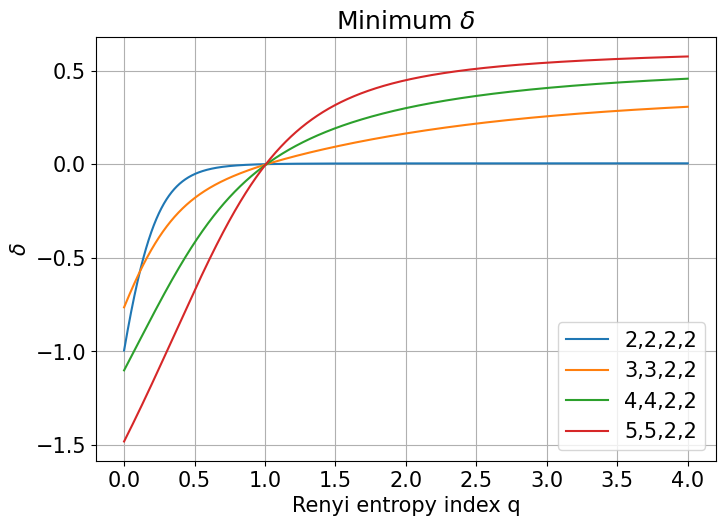

In [4]:
q_values = np.linspace(0.0, 4.0, 4001)
plot_optimum_difference(entanglement_entropy_AA, reflected_spectrum_AB,
                        q_values, renyi_q=1, figname="gap_v_q_0to4")

## Plot 2
We zoom in the interval between 0.9 - 1.1.

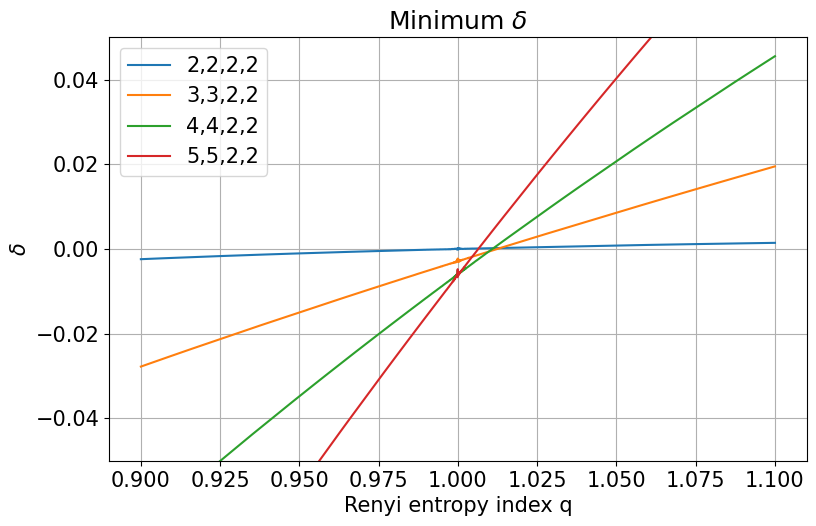

In [5]:
q_values = np.linspace(0.9, 1.1, 3001)
plot_optimum_difference(entanglement_entropy_AA, reflected_spectrum_AB,
                        q_values, renyi_q=1, figsize=(9, 5.5),
                        ylim=[-0.05, 0.05],
                        figname="gap_with_Shannon_entropy_q_0p9to1p1")

## Plot 3
We zoom in the interval 0.99 - 1.01.

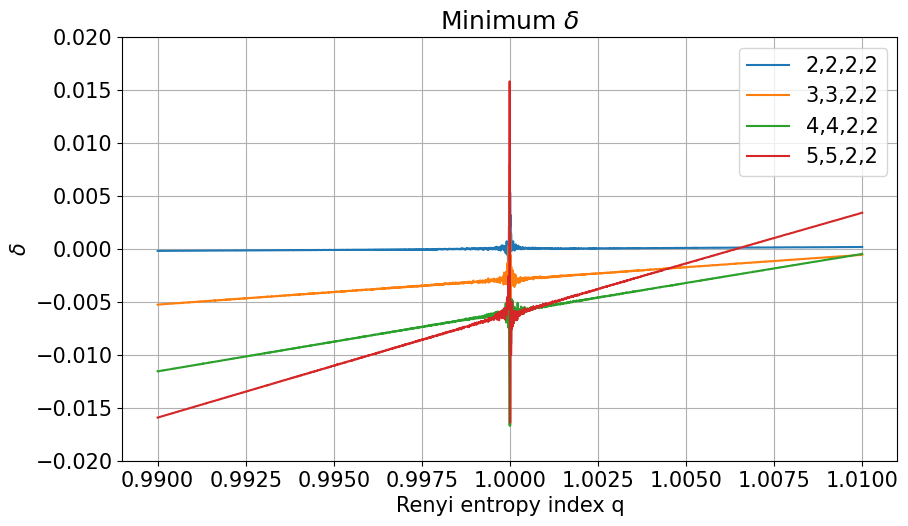

In [6]:
q_values = np.linspace(0.99, 1.01, 3001)
plot_optimum_difference(entanglement_entropy_AA, reflected_spectrum_AB,
                        q_values, renyi_q=1, figsize=(10, 5.5),
                        ylim=[-0.02, 0.02],
                        figname="gap_with_Shannon_entropy_q_0p99to1p01")

## Plot 4
Plot optimum difference between entanglement entropy and half the renyi entropy at a given Renyi index.    

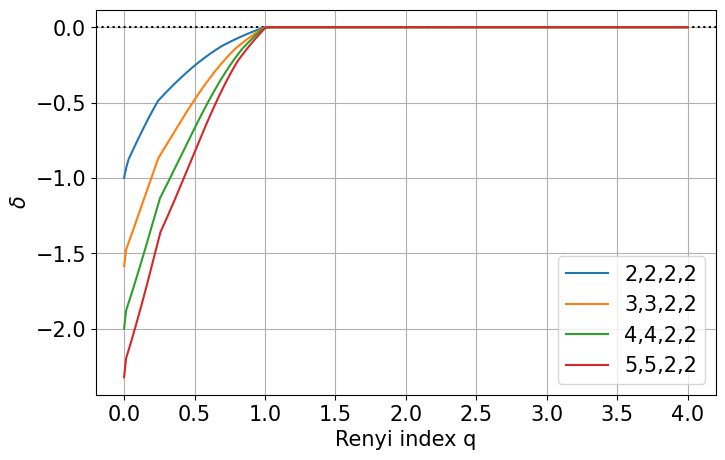

In [7]:
renyi_indices = np.linspace(0.0, 4.0, 4001)
plot_optimum_difference_renyi(entanglement_entropy_AA, reflected_spectrum_AB,
                              renyi_indices, figname="gap_with_Renyi_entropy_q_0to4")

## Plot 5
We zoom in the interval between 0.9 - 1.1 and the interval 0.99 - 1.01.

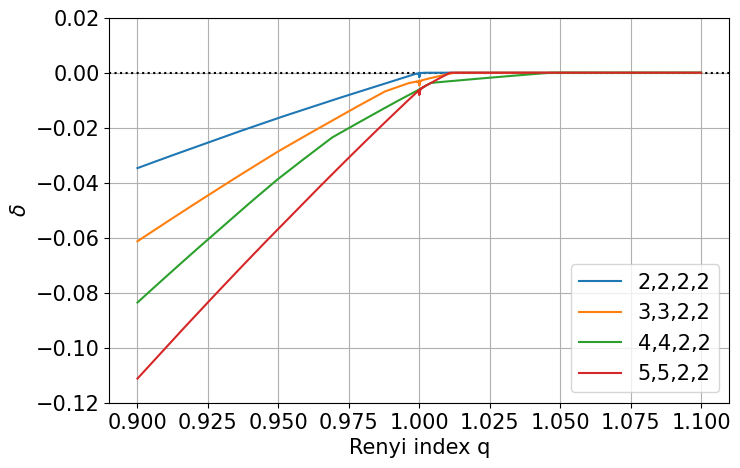

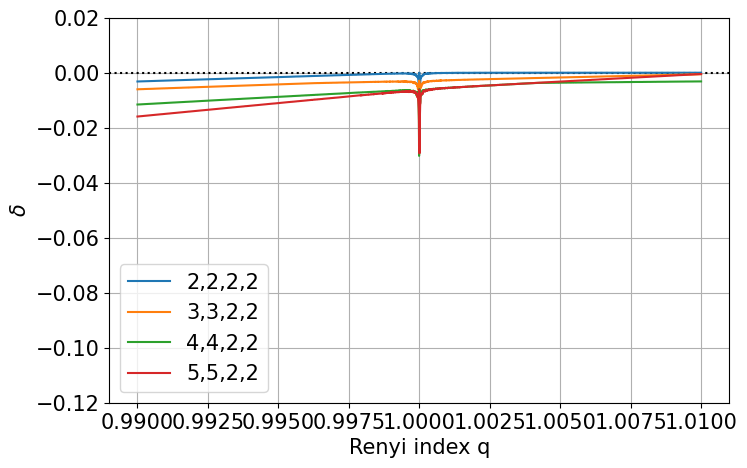

In [8]:
renyi_indices = np.linspace(0.9, 1.1, 3001)
plot_optimum_difference_renyi(entanglement_entropy_AA, reflected_spectrum_AB,
                              renyi_indices, ylim=(-0.12, 0.02), figname="gap_with_renyi_entropy_q_0p9to1p1")
renyi_indices = np.linspace(0.99, 1.01, 3001)
plot_optimum_difference_renyi(entanglement_entropy_AA, reflected_spectrum_AB,
                              renyi_indices, ylim=(-0.12, 0.02), figname="gap_with_renyi_entropy_q_0p99to1p01")

## Plot 6
We are plotting the tripartite information

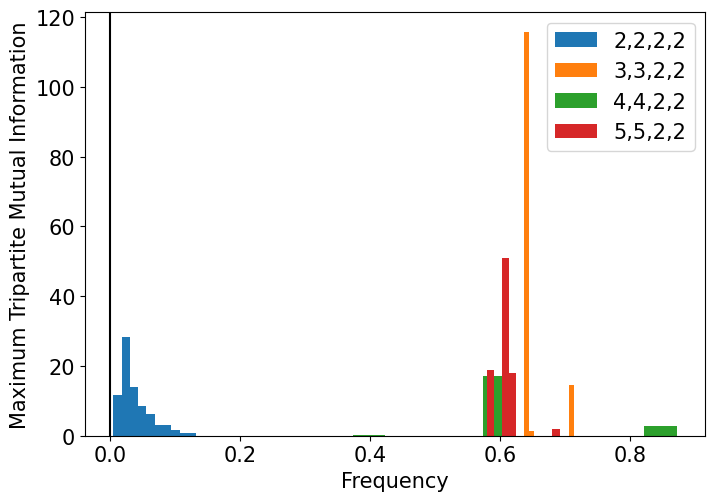

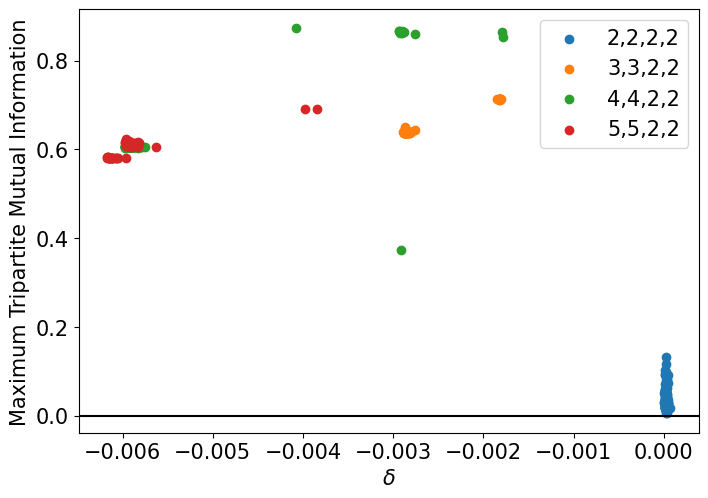

In [9]:
plot_tripartite(states, entanglement_entropy_AA, reflected_spectrum_AB, renyi_index=1, figname="max_tripartite")